# Exploratory Data Analysis (EDA)

## <a id='load_csv'>1. Loading data from CSV file</a>

### Load libraries 

In [3]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import seaborn (for plotting graphs and charts)
import seaborn as sns

#!pip install missingno
import missingno as msno

# Ignore warnings, if any
import warnings
warnings.filterwarnings('ignore')

# Import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

### Load a CSV file from github (or local folder)

In [122]:
# Load CSV file from bank_term_deposit.csv file on local folder
bank_data=pd.read_csv("bank_term_deposit.csv")

### Print the shape of the data (number of observations and features)

In [123]:
# Print the shape
bank_data.shape


(4521, 17)

This dataset contains 4521 observations and 17 features

## <a id='analyze_print'>2. View and Analyze loaded dataset</a>

### Print the first 5 rows of data

In [124]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Print the last 5 rows of data

In [7]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


This dataset contains both numerical and categorical observations. The dependent variable is `y`. It has following independent features:
Attribute Information:
Input variables:
# bank client data:

1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### Print the information about the dataset and its each feature

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


From the above information, it is evident that there are categorical and integer <br>
<b>NONE<b> of them having missing values.


### Print the high-level statistics about dataset using `describe` function - Numerical values

In [9]:
# Describe the dataframe - This describes only the Numerical features by default.
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Print the high-level statistics about dataset using `describe` function - Non-numerical values

In [10]:
# To describe the dataframe that contains categorical features, use 'include' parameter
bank_data.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


<b>job:  There are 12 different jobs. "management" is the job of majority people <br>
<b>marital: Majority are married <br>
<b>education:  Majority people are secondary education <br>
<b>default: majority are NOT in default status  <br>
<b>housing: majority have housing loan <br>
<b>loan : majority do NOT have personal loan<br>
<b>contact: major last contact choice is cellular  <br>
<b>month: last contact month for many is in May <br>
<b>poutcome: majoirty of previous campaign outcome resulted in "unknown" <br>
    
<b>y: client subscribed a term deposit; Vast majority i.e. 90% "no"; only 10% "yes"; dataset is highly imbalanced hence.<br>

### Find-out the distribution of target feature

In [11]:
# Extract and print the value counts of all categorical features in the dataframe
for column in bank_data.select_dtypes(include="object").columns:
    print(bank_data[column].value_counts(normalize=True))
    print('*************************************')
    print()

management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: job, dtype: float64
*************************************

married     0.618668
single      0.264543
divorced    0.116788
Name: marital, dtype: float64
*************************************

secondary    0.510064
tertiary     0.298607
primary      0.149967
unknown      0.041363
Name: education, dtype: float64
*************************************

no     0.98319
yes    0.01681
Name: default, dtype: float64
*************************************

yes    0.566025
no     0.433975
Name: housing, dtype: float64
*************************************

no     0.847158
yes    0.152842
Name: loan, dtype: float64
*************************************

cellular     0.640566
unknown     

## <a id='extract'>3. Extracting info and subset from the Dataframe</a>

### Extract all the column names  

In [12]:
bank_data.job.value_counts(sort=True)

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

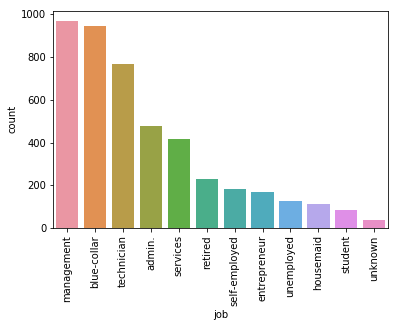

In [13]:
# Visual representation of categorical variables
fig=sns.countplot(x=bank_data.job,data=bank_data,order=bank_data['job'].value_counts().index)
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

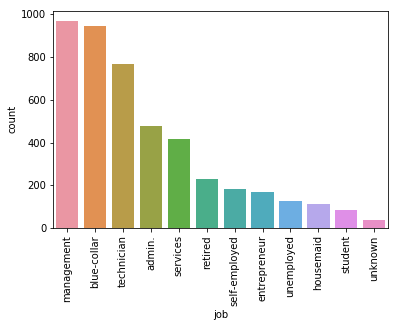

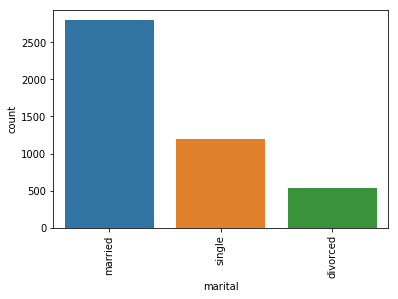

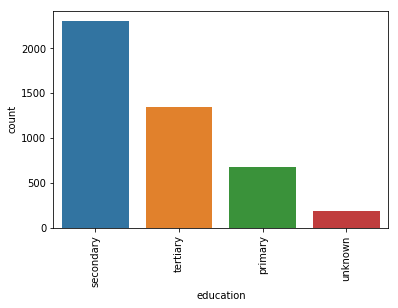

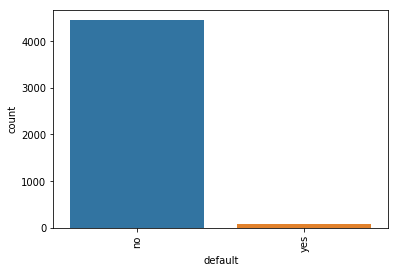

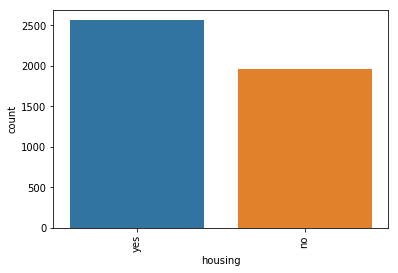

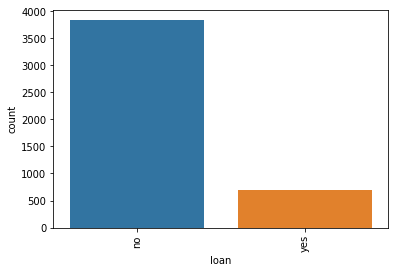

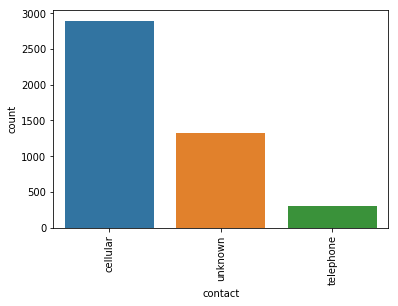

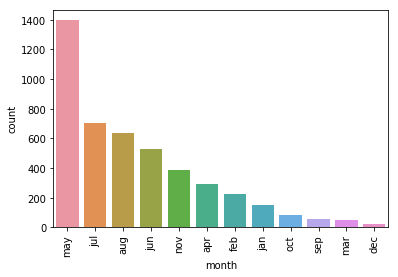

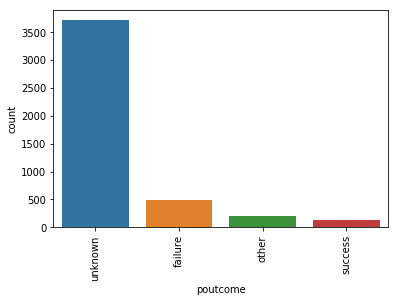

In [14]:
# Visualize all categorical variables in the form of count plots using a loop
for column in bank_data.select_dtypes(include="object").columns:
    if column!='y':
        fig=sns.countplot(x=bank_data[column],data=bank_data,order=bank_data[column].value_counts().index)
        fig.set_xticklabels(fig.get_xticklabels(),rotation=90)             
        plt.show(fig)
    

#Print the column names that are of types `float64` and `int64`
#Hint: np.float64 and np.int64

In [15]:
bank_data_int_float_cols=bank_data.select_dtypes(include=[np.float64,np.int64])
bank_data_int_float_cols

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
5,35,747,23,141,2,176,3
6,36,307,14,341,1,330,2
7,39,147,6,151,2,-1,0
8,41,221,14,57,2,-1,0
9,43,-88,17,313,1,147,2


In [16]:
bank_data_number_cols = []
for i in bank_data.columns:
    if (bank_data[i].dtype in ['int64', 'float64']):    # Note that the dtype is checked in List
        bank_data_number_cols.append(i)
bank_data_number_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [17]:
# Alternate approach to extract the column names that are not of type 'object'. (It means of type 'int64' or 'float64') 
bank_data_number_cols = [i for i in bank_data.columns if bank_data[i].dtype != 'object']
bank_data_number_cols


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Get the Correlation matrix from dataframe

In [18]:
# Generate a correlation matrix. This returns a dataframe
bank_data_corr = bank_data.corr()
bank_data_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


### Get the absolute value of correlation matrix 

In [19]:
# Compute correlation matrix and get the absolute value
bank_data_corr = bank_data.corr().abs()
bank_data_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,0.017853,0.002367,0.005148,0.008894,0.003511
balance,0.083820,1.000000,0.008677,0.015950,0.009976,0.009437,0.026196
day,0.017853,0.008677,1.000000,0.024629,0.160706,0.094352,0.059114
duration,0.002367,0.015950,0.024629,1.000000,0.068382,0.010380,0.018080
campaign,0.005148,0.009976,0.160706,0.068382,1.000000,0.093137,0.067833
pdays,0.008894,0.009437,0.094352,0.010380,0.093137,1.000000,0.577562
previous,0.003511,0.026196,0.059114,0.018080,0.067833,0.577562,1.000000


In [20]:
# Print correlation matrix shape.
bank_data_corr.shape

(7, 7)

### Construct an unit matrix to the shape of correlation matrix 

In [21]:
np.ones(bank_data_corr.shape)

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

### Keep the upper diagonal triangle to 1 and others to 0

In [22]:
np.triu(np.ones(bank_data_corr.shape), k=1)

array([[0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.]])

### Convert the resultant matrix to boolean 

In [23]:
np.triu(np.ones(bank_data_corr.shape), k=1).astype(np.bool)

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

### Coerce the Correlation matrix to the above resultant matrix

In [24]:
bank_data_corr.where(np.triu(np.ones(bank_data_corr.shape), k=1).astype(np.bool), inplace=True)
bank_data_corr

,age,balance,day,duration,campaign,pdays,previous
age,NaN,0.08382,0.017853,0.002367,0.005148,0.008894,0.003511
balance,NaN,NaN,0.008677,0.015950,0.009976,0.009437,0.026196
day,NaN,NaN,NaN,0.024629,0.160706,0.094352,0.059114
duration,NaN,NaN,NaN,NaN,0.068382,0.010380,0.018080
campaign,NaN,NaN,NaN,NaN,NaN,0.093137,0.067833
pdays,NaN,NaN,NaN,NaN,NaN,NaN,0.577562
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Set Correlation threshold above which the columns have to be deleted from dataframe 

In [25]:
# In this dataset, 0.5 value is taken as threshold because we want to identify at least a feature that is highly correlated.
# Usual correlation range: 90 to 95% (0.90 to 0.95)
CORR_THRESHOLD = 0.5  

bank_data_corr = (bank_data_corr > CORR_THRESHOLD)
bank_data_corr

,age,balance,day,duration,campaign,pdays,previous
age,False,False,False,False,False,False,False
balance,False,False,False,False,False,False,False
day,False,False,False,False,False,False,False
duration,False,False,False,False,False,False,False
campaign,False,False,False,False,False,False,False
pdays,False,False,False,False,False,False,True
previous,False,False,False,False,False,False,False


### Export the correlation matrix into a CSV file 

In [26]:
# This snippet will save a CSV file in the local file system that can be opened as a spreadsheet
bank_data_corr.to_csv("bank_data_corr_matrix.csv")

### Correlation matrix - Heatmap 

In [27]:
# Compute correlation matrix 
bank_data_corr = bank_data.corr()

# Print color gradient plot 
bank_data_corr.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1,0.0838201,-0.0178526,-0.00236689,-0.0051479,-0.00889353,-0.00351092
balance,0.0838201,1,-0.00867705,-0.0159499,-0.00997617,0.00943668,0.0261964
day,-0.0178526,-0.00867705,1,-0.0246293,0.160706,-0.0943515,-0.0591144
duration,-0.00236689,-0.0159499,-0.0246293,1,-0.068382,0.0103802,0.0180803
campaign,-0.0051479,-0.00997617,0.160706,-0.068382,1,-0.0931368,-0.0678326
pdays,-0.00889353,0.00943668,-0.0943515,0.0103802,-0.0931368,1,0.577562
previous,-0.00351092,0.0261964,-0.0591144,0.0180803,-0.0678326,0.577562,1


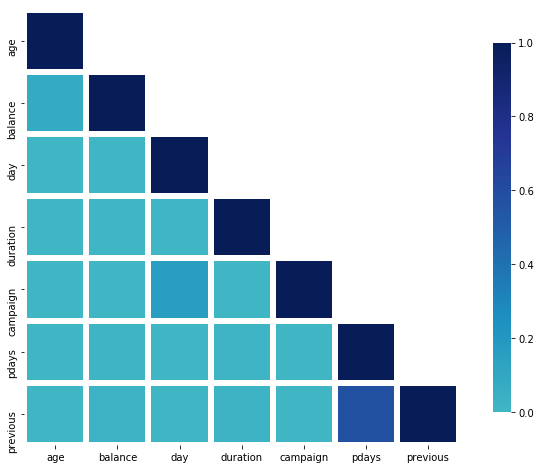

In [28]:
# Create a correlation matrix. It always returns a square matrix
corr = bank_data.corr()

# Set the plotting area/ size
plt.figure(figsize = (12, 8))

# Create a mask to hide the upper triangle
mask = np.triu(np.ones(corr.shape), k=1).astype(np.bool)

# Plot the heatmap
sns.heatmap(corr, cmap='YlGnBu', vmin=0, mask=mask, vmax=1, center=0, square=True, linewidths=5, cbar_kws={"shrink": .85})

### Correlation matrix - Heatmap with values

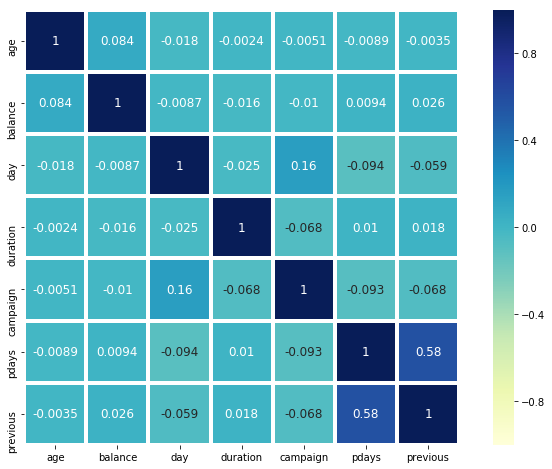

In [29]:
# Set the plotting area/ size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(bank_data_corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=3,
            annot=True, annot_kws={"size": 12}, square=True);

## <a id='analyze_distrib'>4. Analyzing data distribution - Univariate analysis</a> 

In univariate analysis, one feature is analyzed at a time to know more about the data spread, missing values, and outliers if any. This will provide some key insight to the feature. The most popular univariate plots are

- Histogram
- Box and Whisker plot

In [30]:
bank_data_number_cols    #Numeric columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Histogram - Plot a Numerical feature

0.6995014533559305
0.3487754872611486


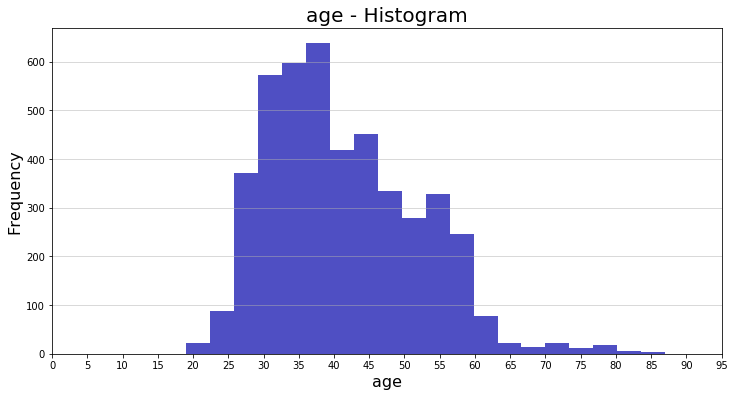

In [31]:
# Set plotting area/ size
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(x = bank_data['age'], bins=20, color='#0504aa', alpha=0.7, rwidth=1)

# Set grid for Y-axis
plt.grid(axis='y', alpha=0.6)

# Set X-axis label
plt.xlabel('age', fontdict = {'fontsize': 16, 'fontweight': 'medium'})

plt.xticks((np.arange(0, 100, step=5)))

# Set Y-axis label
plt.ylabel('Frequency', fontdict = {'fontsize': 16, 'fontweight': 'medium'})

# Set Histogram title
plt.title('age - Histogram', fontdict = {'fontsize': 20, 'fontweight': 'medium'})

print(bank_data.age.skew())  #skewness
print(bank_data.age.kurt())  #kurtosis


# age seems to be a vey slightly right skewed distribution

In [32]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

rows:  3


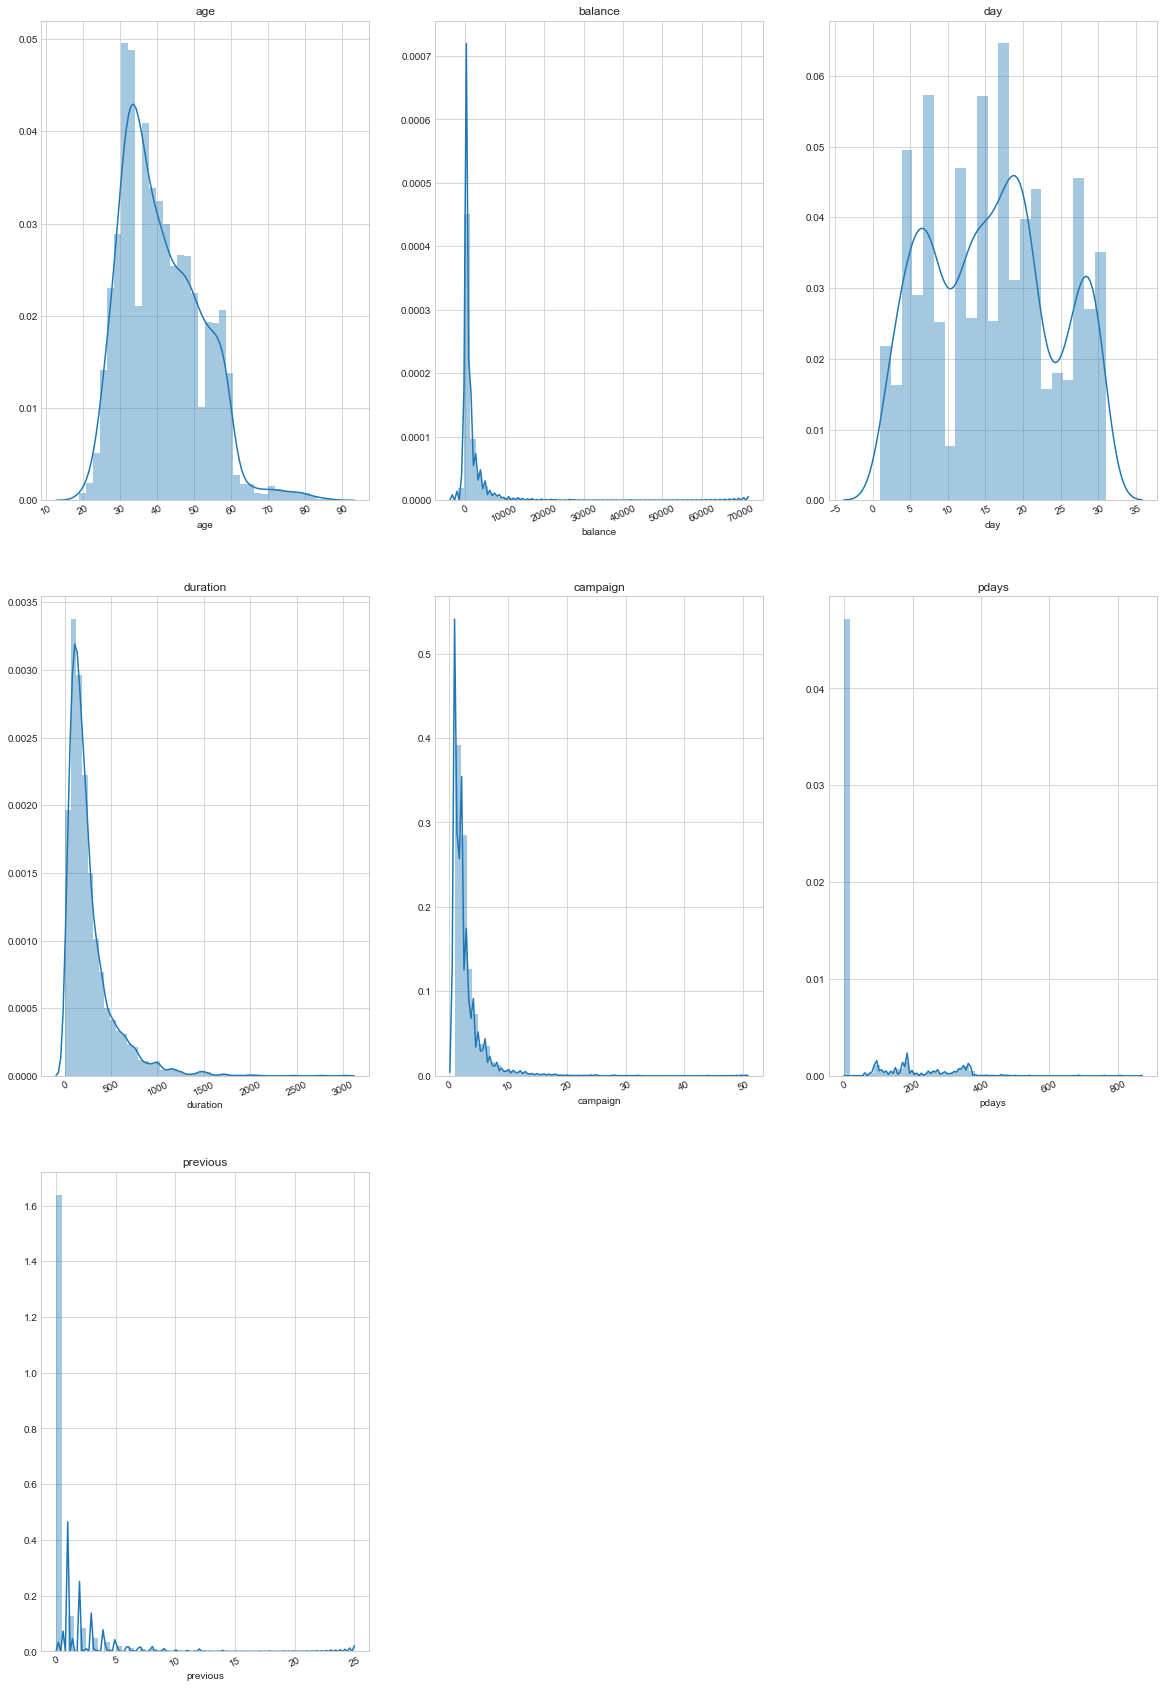

In [33]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Define a method that draws univariate plot for all the numeric features in a given dataset
def univariate_plot(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    
    # Set what plot style you want to use. seaborn-whitegrid, ggplot, etc.
    # Execute "print(plt.style.available)" to list the difference plotting styles that can be used.
    plt.style.use('seaborn-whitegrid')
    
    # Set the overall height and width of the plot. Remember the sizes are in inches.
    fig = plt.figure(figsize=(width, height))  # Default: Width=20, Height=15 plots in a row
    
    # Set the gap between each sub-plots. (width and height spaces)
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    
    # Compute no of rows required using total features extracted and col input
    rows = math.ceil(float(dataset.shape[1]) / cols) # Default 5 plots in a row
    print("rows: ",rows)
    
    # Notice that that we are extracting the column name and its position (i) using enumerator.
    for i, column in enumerate(dataset.columns):
        
        # The row and cols represent the grid structure of overall plot. The last param i represent the n-th plot
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Set the plot's title
        ax.set_title(column)
        
        # If datatype is Categorical (object) type, plot histogram
        if dataset.dtypes[column] in (np.int64,np.float64):      
            # Plot distribution chart
            sns.distplot(dataset[column].dropna())
            
            # Set X-axis label with 25 deg rotation
            plt.xticks(rotation=25)
    

# Call the function to draw 

univariate_plot(bank_data[bank_data_number_cols], cols=3, width=20, height=30, hspace=0.2, wspace=0.2)

# Looks like numerical features are rightly skwed. Let us find skewness and kurtosis

In [34]:
for column in bank_data_number_cols:
    print("Feature name: " + column)
    print("************************")
    print(bank_data[column].skew())
    print(bank_data[column].kurt())
    print()
    print()
    

Feature name: age
************************
0.6995014533559305
0.3487754872611486


Feature name: balance
************************
6.596430546295735
88.39033211861796


Feature name: day
************************
0.09462690455175846
-1.0395310625320089


Feature name: duration
************************
2.7724197169136455
12.530049737749446


Feature name: campaign
************************
4.74391446894159
37.168920102993624


Feature name: pdays
************************
2.71707136656418
7.957127901823425


Feature name: previous
************************
5.875258677896706
51.995211518308764




# Skewness and Kurtosis values range:
<b>Generally Acceptable range for each of these between: -2 and +2<b>

<b>Above Observations show that:<b><br>
    
    balance: 
        having long tails and having lots of outliers
        also right skwed distribution
    
    duration:
        having slightly long tails and outliers
        
    campaign:
        having slightly long tails and outliers 
        
    pdays:        
        having slightly long tails and outliers
        
    previous:
        having long tails and having lots of outliers

### Box and Whisker plot

### Plot Box and Whisker plot for a numerical feature

### Homework: Plot Box-Whisker plot for the following numerical features:
bank_data_number_cols





In [57]:
def box_plot(dataset):
    # Set plotting area/ size
    fig=plt.figure(figsize=(14,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    for i,column in enumerate(dataset.columns):
        
        # Extract feature to be Box-Whisker plotted
        x = bank_data[column]

        # Define outlier's shape, color, and size
        red_square = dict(marker='o', markerfacecolor='r', markersize=8)

        # Plot Box-Whisker
        plt.subplot(4,2,i+1)   #set the sub plot
        plt.boxplot(x, vert=True, flierprops=red_square,showfliers=True) # plot the box plot

        # Set X-axis label
        plt.xlabel('Range')

        # Set Box-Whisker title
        plt.title('Box & Whisker plot of: '+ column,)

        # Set grid properties for Box-Whisker plot
        plt.grid(color='r', linestyle='-', linewidth=0.2)

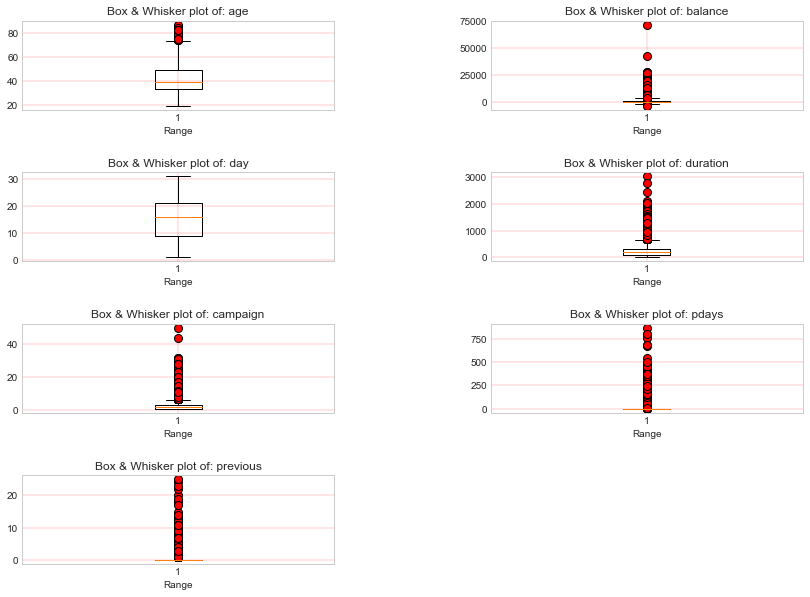

In [58]:
box_plot(bank_data[bank_data_number_cols])

# Let us look take a look at some of the outliers for each of these

In [69]:
print("Features and their 99th percentiles:")
percentiles=[]
for column in bank_data_number_cols:    
    percentile=np.percentile(bank_data[column],99)
    print(column,percentile,sep=",")    
    percentiles.append(percentile)
print(percentiles)

Features and their 99th percentiles:
age,72.0
balance,14194.600000000024
day,31.0
duration,1259.0
campaign,16.0
pdays,370.0
previous,8.0
[72.0, 14194.600000000024, 31.0, 1259.0, 16.0, 370.0, 8.0]


In [73]:
for i,column in enumerate(bank_data_number_cols):
    print(column)
    print("*****************************************************************************************")
    print(bank_data[bank_data[column]>percentiles[i]].head())
    print()
    print()

age
*****************************************************************************************
     age        job   marital  education default  balance housing loan  \
36    78    retired  divorced    primary      no      229      no   no   
129   77    retired  divorced   tertiary      no     4659      no   no   
166   78  housemaid   married  secondary      no      499      no   no   
199   75    retired   married  secondary      no     3771      no   no   
412   75    retired  divorced   tertiary      no     3810     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome    y  
36   telephone   22   oct        97         1     -1         0  unknown  yes  
129   cellular   14   apr       161         1     -1         0  unknown  yes  
166  telephone   16   mar        80         4     -1         0  unknown   no  
199  telephone   15   apr       185         1    181         2  success  yes  
412   cellular   16   nov       262         1    183         1  fa

#  Add your outlier analysis here:


?????????????????????????????????????????????????????????????????????????




###### <a id='analyze_scatter'>6. Analyzing data distribution - Bivariate Analysis</a>

In bivariate analysis, more than one features are analyzed together to see how they interact with each other. This will provide some key insight to the data, their relationship, and outliers if any. The most popular bivariate plots are

- pair plots


### Scatter Plot - Loan Amount Term versus Loan Amount

In [75]:
bank_data_number_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<Figure size 1440x1152 with 0 Axes>

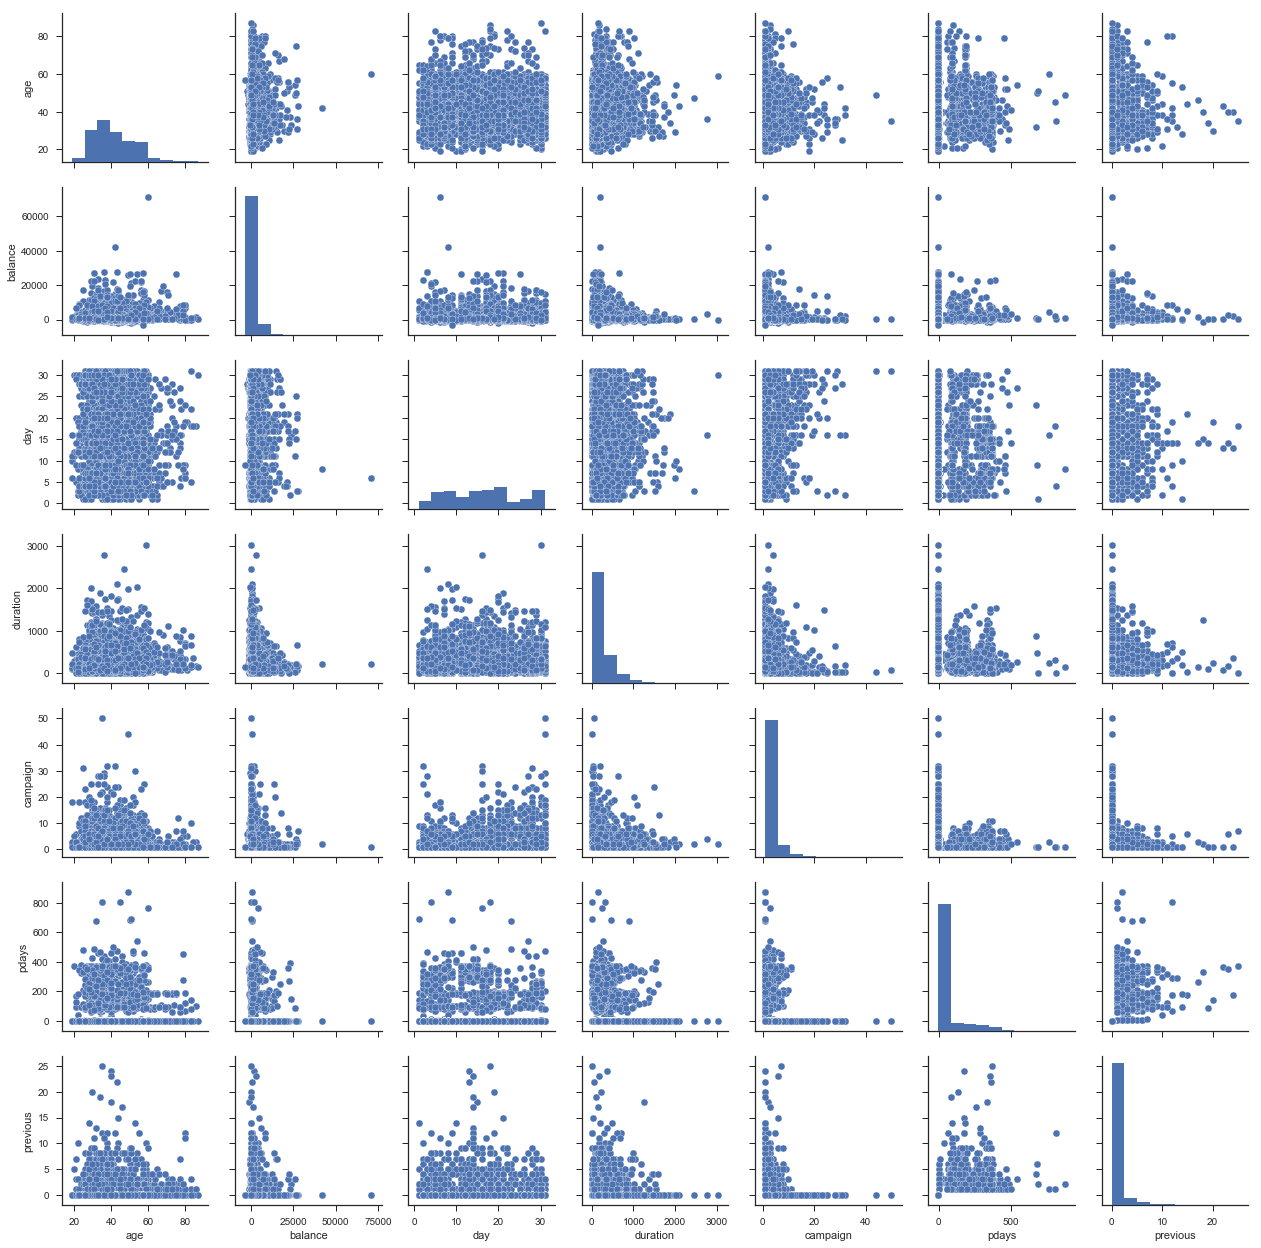

In [98]:
# Set plotting area/ size
plt.figure(figsize=(20,16))

bank_data_with_number_cols=bank_data[bank_data_number_cols]


g=sns.pairplot(data=bank_data_with_number_cols)


# Let us do some outlier analysis using pair plots

???????????????????????????????????????????????????????????????????????



### Compare all the categorical features w.r.t. dependent feature 'y'

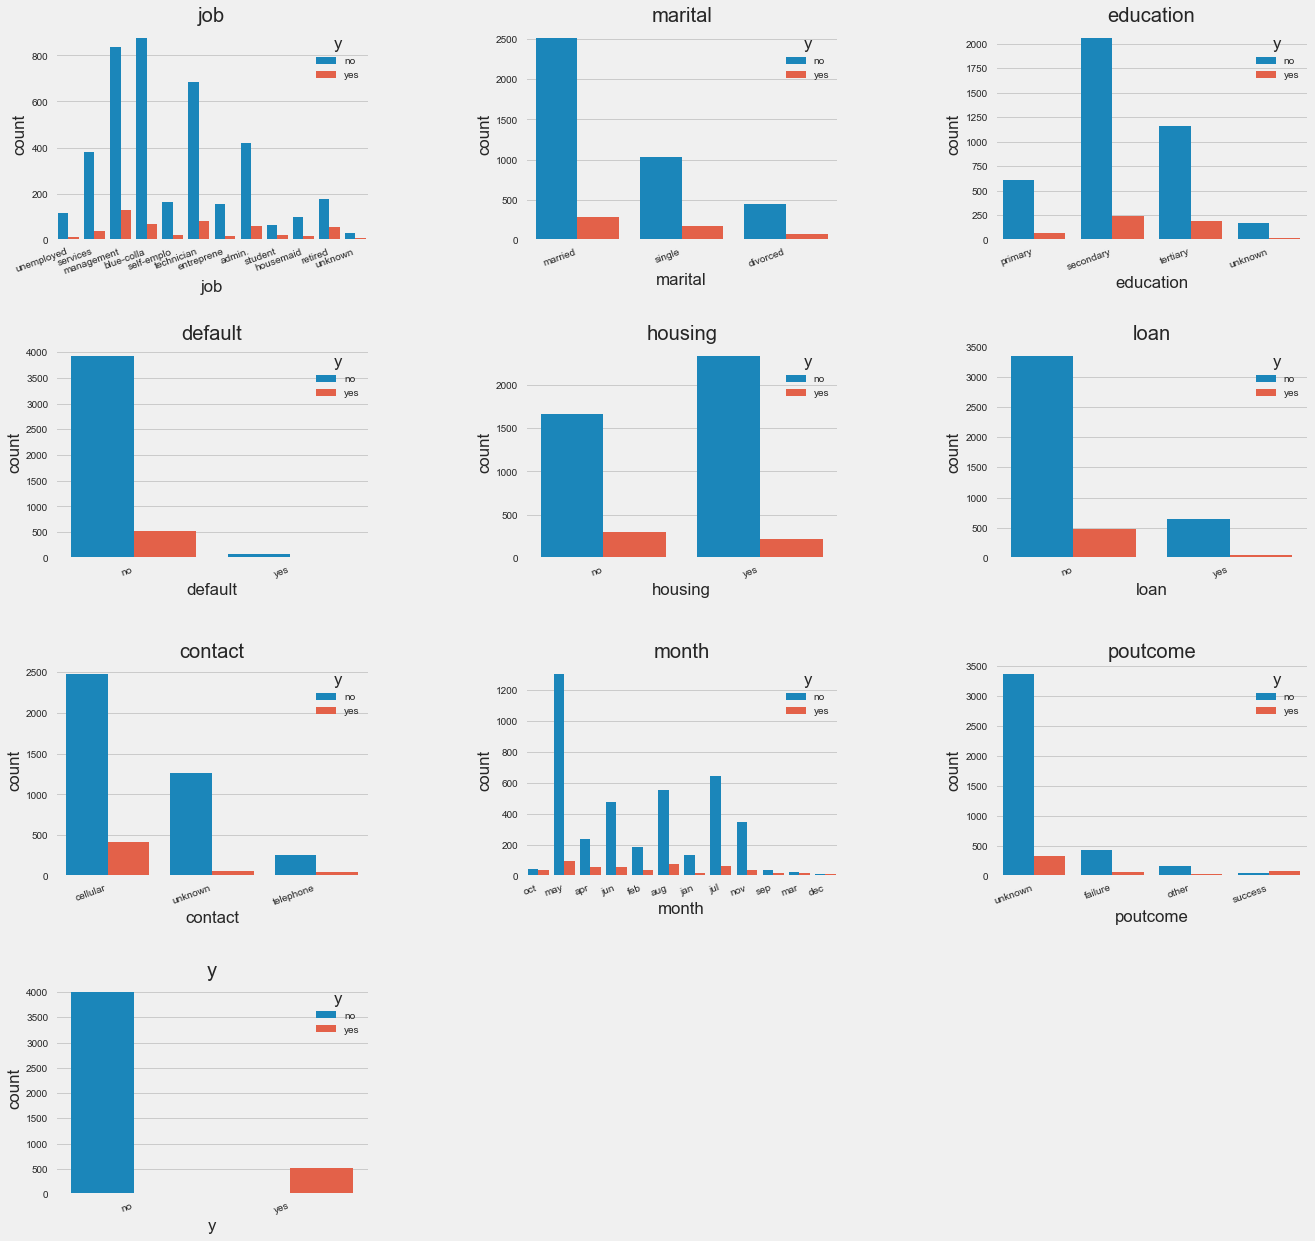

In [102]:
import math

# Plot a count of the categories from each categorical feature split by our prediction class: salary - predclass.
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    # Select the columns that are of type object (categorical features)
    dataset = dataset.select_dtypes(include=[np.object])
    
    # Set what plot style you want to use. seaborn-whitegrid, ggplot, etc.
    # Execute "print(plt.style.available)" to list the difference plotting styles that can be used.
    plt.style.use('fivethirtyeight')
    
    # Set the overall height and width of the plot. Remember the sizes are in inches.
    fig = plt.figure(figsize=(width, height))
    
    # Set the gap between each sub-plots. (width and height spaces)
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    
    # Compute no of rows required using total features extracted and col input
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    # Notice that that we are extracting the column name and its position (i) using enumerator.
    for i, column in enumerate(dataset.columns):
        
        # The row and cols represent the grid structure of overall plot. The last param i represent the n-th plot
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Set the plot's title
        ax.set_title(column)
        
        # Create plot 
        cplot = sns.countplot(x=column, hue=hue, data=dataset)
        
        # Limit the texts of X axis to 10 characters
        x_substr = [str.get_text()[:10] for str in cplot.get_xticklabels()]
        cplot.set_xticklabels(x_substr, rotation=20, ha="right")
        
            
# Call the function to draw 
plot_bivariate_bar(bank_data, hue='y', cols=3, width=20, height=20, hspace=0.5, wspace=0.5)